In [1]:
%matplotlib inline
import torch
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random

# 生成数据集

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2

features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

In [3]:
print(features[0], labels[0])

tensor([-0.0010, -0.1725]) tensor(4.7761)


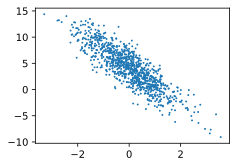

In [4]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

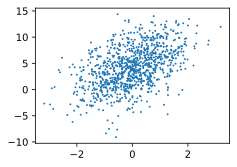

In [5]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);

# 读取数据

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])  # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.7923, -0.7921],
        [ 0.0026,  0.0670],
        [-0.1764,  0.8549],
        [-0.0224,  0.7216],
        [-0.2405,  0.7843],
        [ 1.4838, -1.2051],
        [ 0.4711, -0.3952],
        [ 0.0789, -0.2596],
        [-0.0782, -0.3392],
        [ 0.5265, -0.7436]]) tensor([ 5.3210,  3.9567,  0.9362,  1.6933,  1.0364, 11.2650,  6.4833,  5.2523,
         5.1935,  7.7713])


# 初始化模型参数

In [8]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [9]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

# 定义模型

In [10]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

# 定义损失函数

In [11]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

# 定义优化函数

In [12]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

# 训练模型

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一次迭代周期中，会使用训练数据集中所有样本一次（假设样本数据能够被批量大小整除）
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 将梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.046604
epoch 2, loss 0.000182
epoch 3, loss 0.000049


In [14]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9989],
        [-3.3995]], requires_grad=True)
4.2 
 tensor([4.1993], requires_grad=True)
